In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation

In [2]:
# download the data
life_expectancy = pd.read_csv(
    "https://raw.githubusercontent.com/open-numbers/ddf--gapminder--life_expectancy/master/ddf--datapoints--life_expectancy_at_birth--by--geo--time.csv")
income = pd.read_csv(
    "https://raw.githubusercontent.com/open-numbers/ddf--gapminder--gdp_per_capita_cppp/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
population = pd.read_csv(
    "https://raw.githubusercontent.com/open-numbers/ddf--gapminder--population_historic/master/ddf--datapoints--population_total--by--geo--time.csv")
countries = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--population/master/ddf--entities--geo--country.csv")

In [3]:
# merge the data
data = life_expectancy.merge(income, on=["geo", "time"]).merge(population, on=["geo", "time"])
data = data.merge(countries[["world_6region", "country"]], left_on="geo", right_on="country")

# rename the region color
data.rename(columns={"world_6region":"Region"}, inplace=True)

# capitalize the first letter of each region
data["Region"] = data["Region"].apply(lambda x: x.replace("_", " ").title())

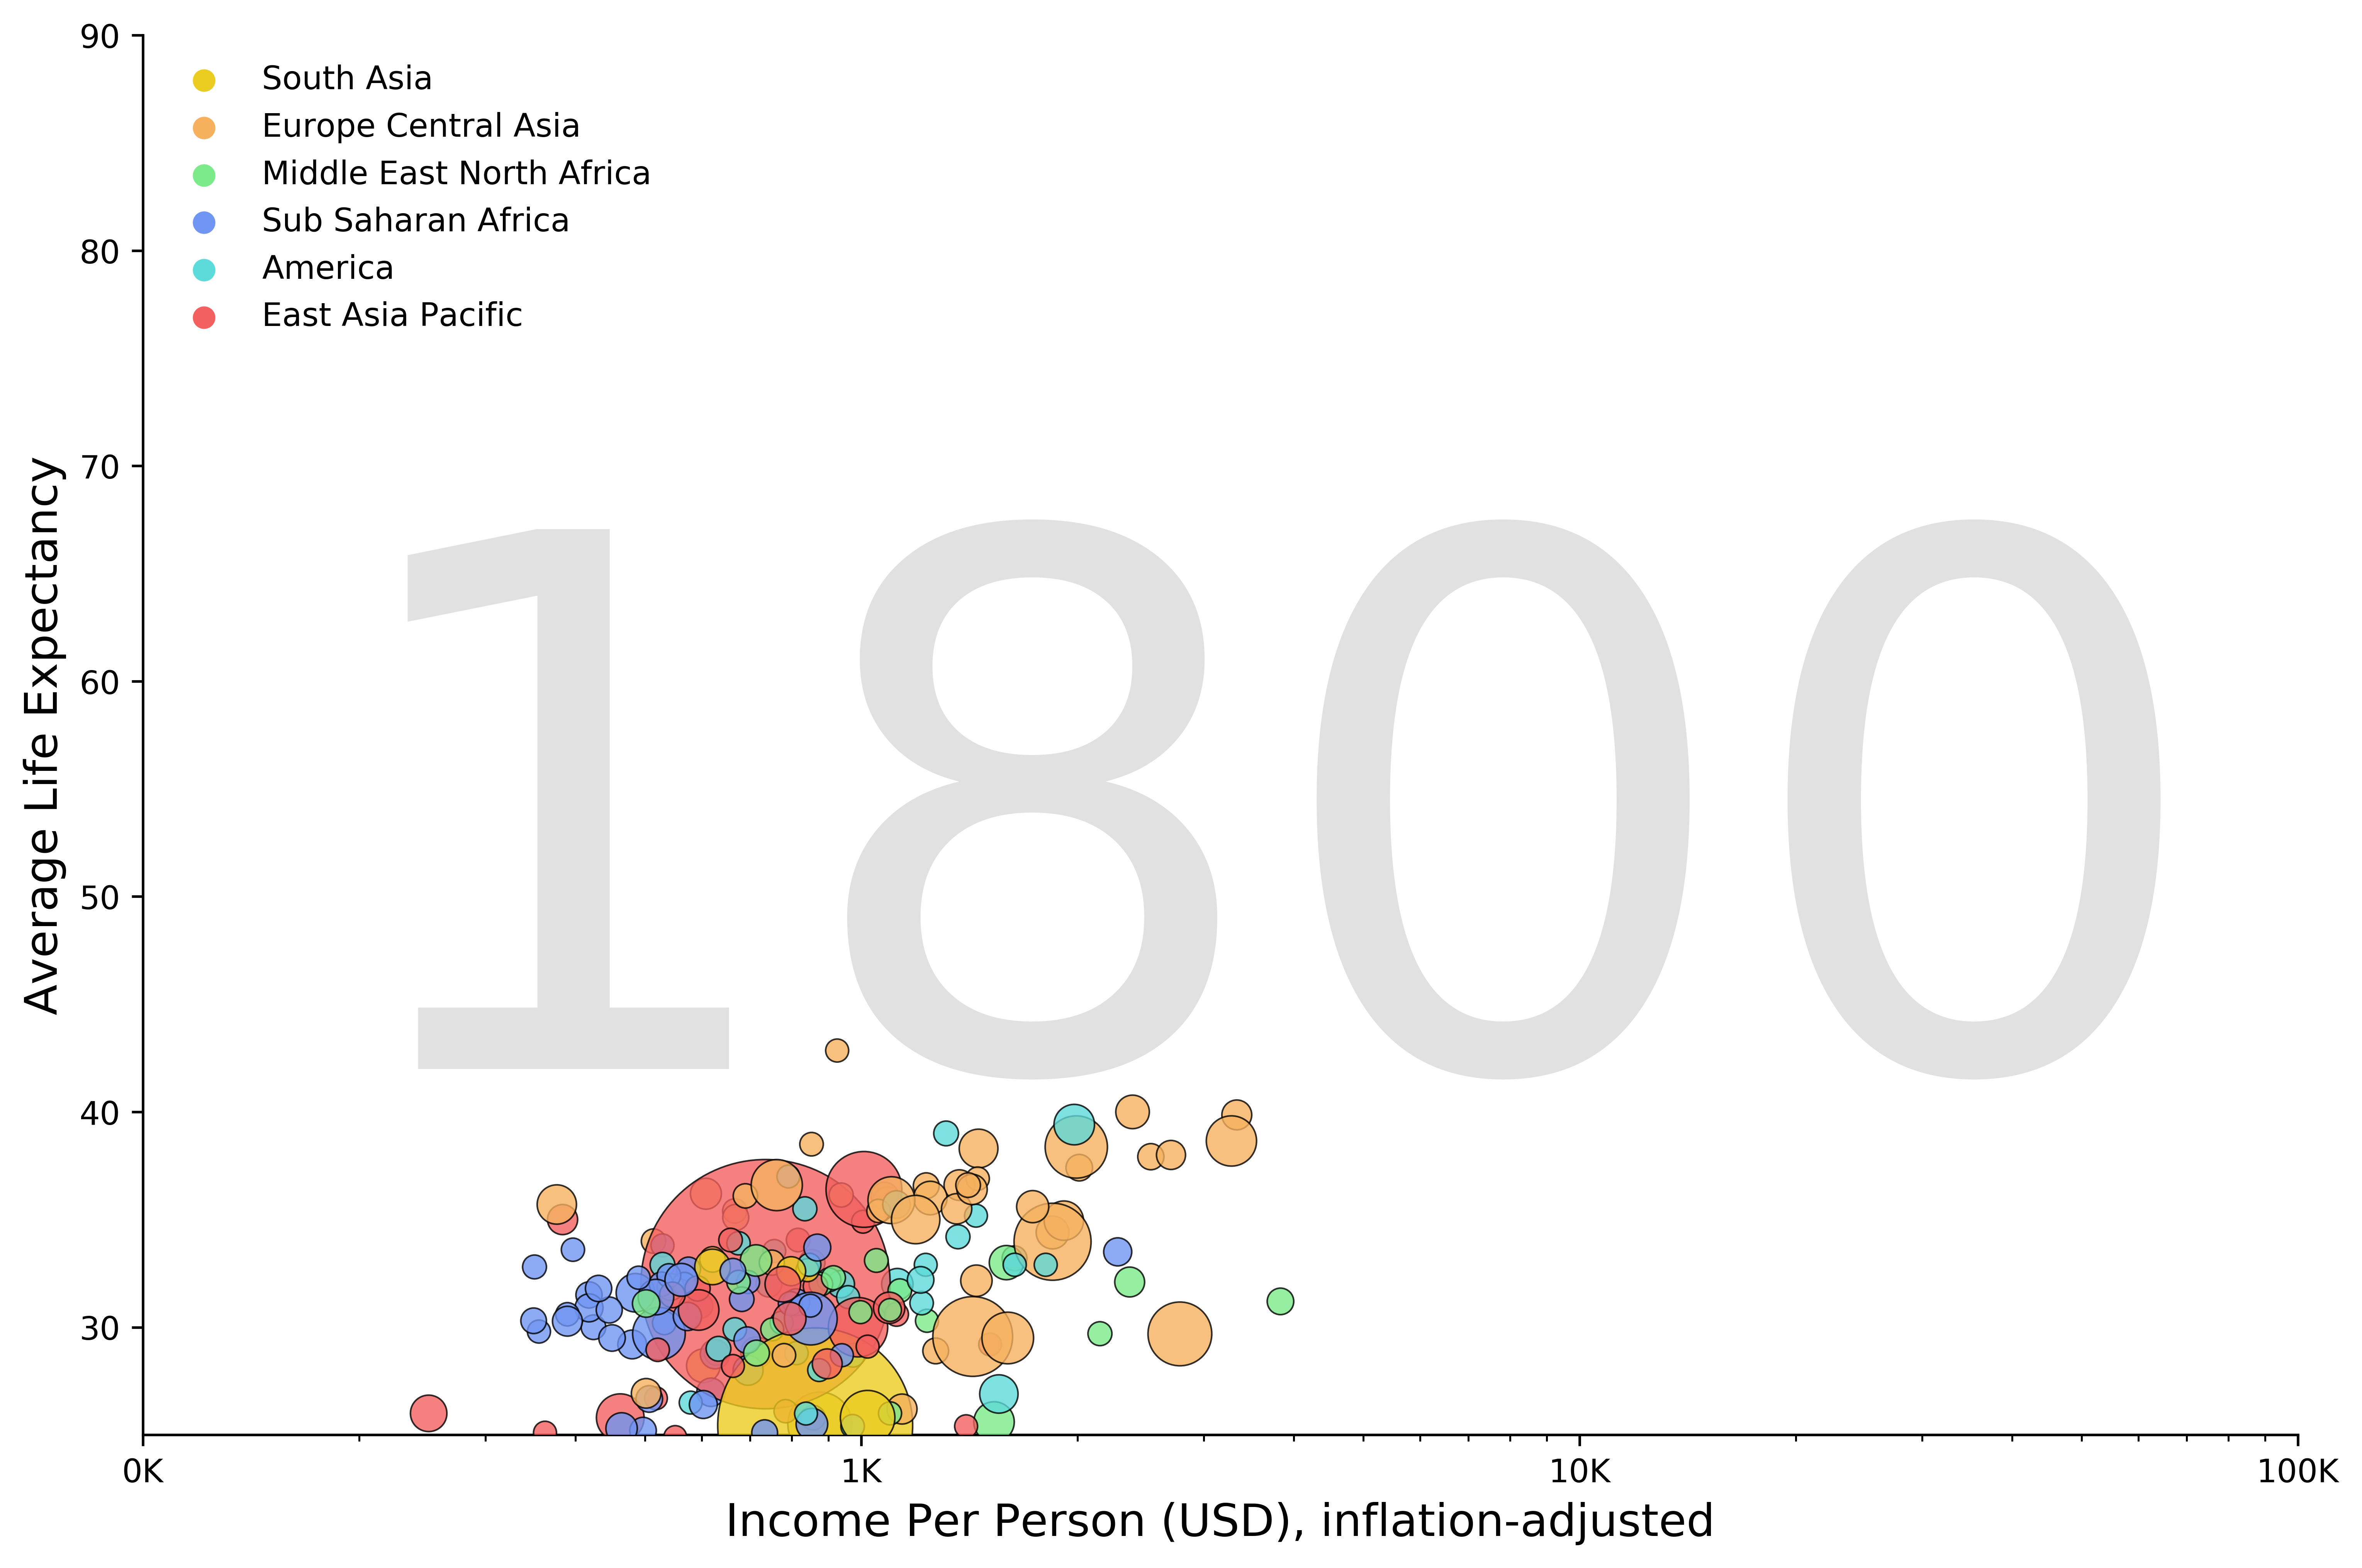

In [13]:
m=1

fig, ax = plt.subplots(figsize = (12, 8), dpi=600)

bubble_colors = [
                 '#EBCC21', 
                 '#F6B15F',
                 '#7CEA89',
                 '#7195F3', 
                 '#5DDADA',
                 '#F36060', 
                ]

axis_label_font_dict = {"fontsize":14}

def animate(i):
    ax.cla() # erase the previous scatterplot 
    year = 1800 + i
    sns.scatterplot(x = 'income_per_person_gdppercapita_ppp_inflation_adjusted',
                    y = 'life_expectancy_at_birth',
                    size = 'population_total',
                    data = data[data['time'] == year],
                    hue = 'Region', # basis of the bubbles' color
                    ax = ax,
                    alpha = 0.8, # transparency
                    sizes = (50, 6000),
                    palette= bubble_colors, # bubble colors
                    zorder=5, # bring bubbles to the front
                    edgecolor="black",
                    linewidth=.5
                   )
    # display the year
    ax.text(180 , 42, s=year, fontdict={"fontsize":230, "color":"#E1E1E1"}, zorder=0 )
    
    # X-axis settings
    ax.set_xscale('log')
    xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks() / 1000]
    ax.set_xticklabels(xlabels)
    ax.set_xlim(100, 100000)
    ax.set_xlabel("Income Per Person (USD), inflation-adjusted", fontdict=axis_label_font_dict)

    # Y-axis settings
    ax.set_ylim(25, 90)
    ax.set_ylabel("Average Life Expectancy", fontdict=axis_label_font_dict)
    
    # Legend settings
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[1:7], labels[1:7], loc="upper left", frameon=False)
    
    # hide right and top spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    


ani = animation.FuncAnimation(fig = fig, func = animate, frames = 2020-1800, interval=400)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=3, bitrate=-1) #<--


ani.save("income_lifeexp_animated.mp4", writer=writer)